In [ ]:
# 📊 Section 2: Cyber Attack Detection
#**Dataset:** NSL-KDD
#**Goal:** Build and compare a Random Forest and a 1D CNN for multi-class network intrusion detection.


Categorical columns to encode: ['duration', 'protocol_type', 'service', 'dst_host_srv_rerror_rate']
After PCA – Train shape: (125973, 20) Test shape: (20548, 20)
=== Random Forest Classification Report ===
              precision    recall  f1-score   support

           0       0.49      0.32      0.39       114
           1       0.15      0.12      0.13        78
           2       0.13      0.24      0.17        49
           3       0.37      0.06      0.11       112
           4       0.31      0.19      0.24        93
           5       0.36      0.13      0.19        98
           6       0.57      0.08      0.14       153
           7       0.53      0.56      0.55       227
           8       0.64      0.24      0.34       119
           9       0.27      0.19      0.22        96
          10       0.48      0.35      0.40       185
          11       0.66      0.60      0.63       436
          12       0.53      0.39      0.45       466
          13       0.40      0.41    

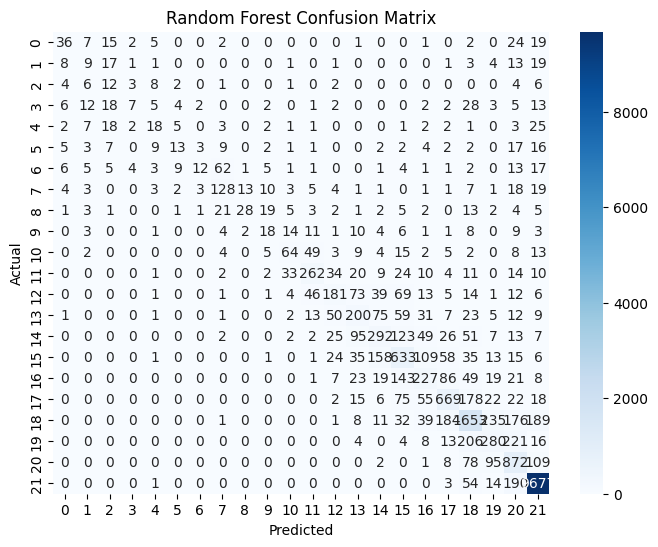

Epoch 1/15
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5105 - loss: 1.5808 - val_accuracy: 0.5457 - val_loss: 1.8881
Epoch 2/15
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6007 - loss: 1.1830 - val_accuracy: 0.5494 - val_loss: 1.7336
Epoch 3/15
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6229 - loss: 1.1020 - val_accuracy: 0.5603 - val_loss: 1.7215
Epoch 4/15
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6321 - loss: 1.0642 - val_accuracy: 0.5655 - val_loss: 1.6860
Epoch 5/15
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6334 - loss: 1.0426 - val_accuracy: 0.5634 - val_loss: 1.6514
Epoch 6/15
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6408 - loss: 1.0151 - val_accuracy: 0.5708 - val_loss: 1.6139
Epoch 7/15
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6444 - loss: 1.0059 - val_accuracy: 0.5873 - val_loss: 1.6427
Epoch 8/15
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6484 - loss: 0.9933 -

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


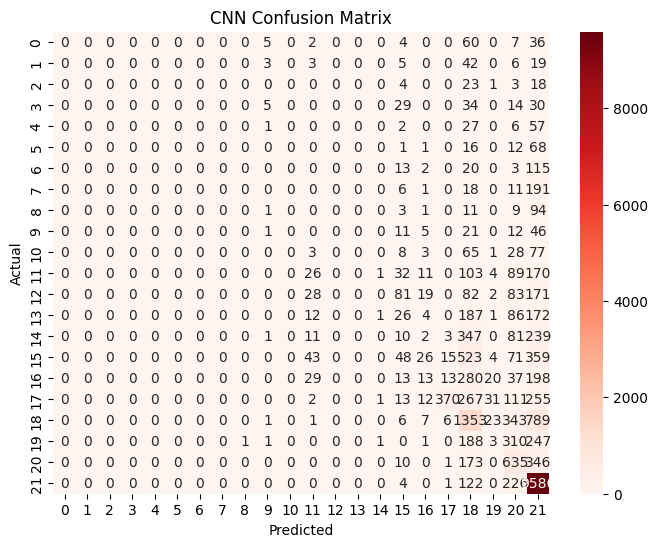

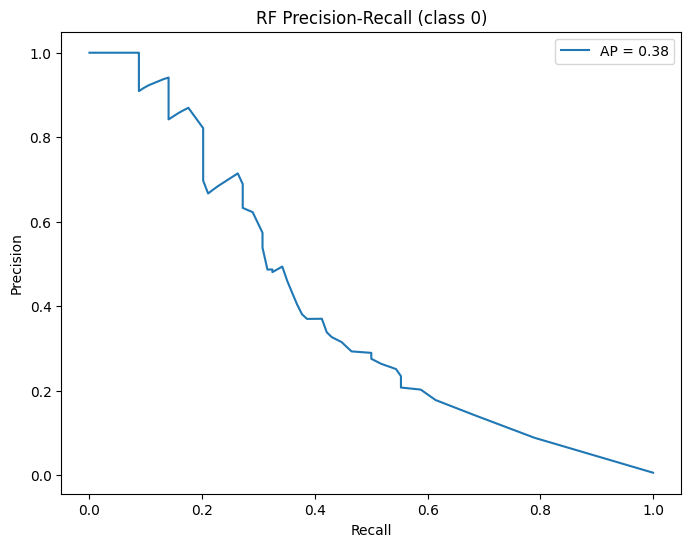

643/643 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


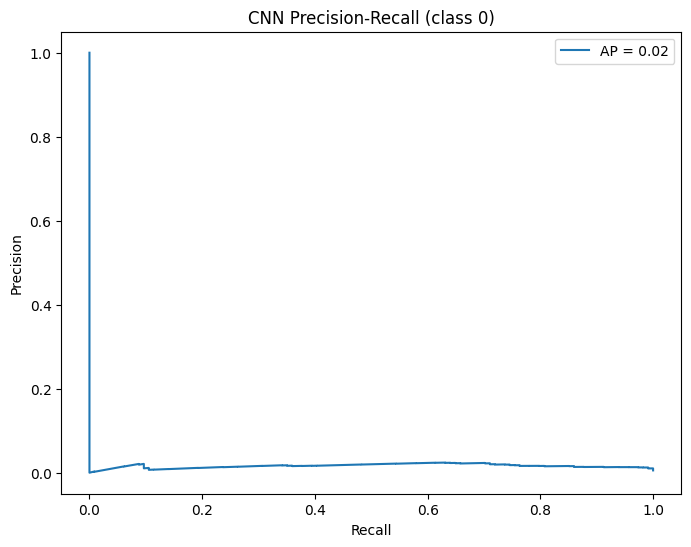

In [ ]:


#-------------------------------
# 2. Load NSL-KDD Dataset
#-------------------------------
import pandas as pd
import numpy as np

# Update these paths to where you've uploaded KDDTrain+.txt and KDDTest+.txt
train_path = "/content/drive/My Drive/archive/KDDTrain+.txt"
test_path  = "/content/drive/My Drive/archive/KDDTest+.txt"

# Column names (as per NSL-KDD documentation)
columns = [
    "duration","protocol_type","service","flag","src_bytes","dst_bytes",
    "land","wrong_fragment","urgent","hot","num_failed_logins","logged_in",
    "num_compromised","root_shell","su_attempted","num_root","num_file_creations",
    "num_shells","num_access_files","num_outbound_cmds","is_host_login",
    "is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
    "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate",
    "srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"
]

# Read the files
df_train = pd.read_csv(train_path, names=columns)
df_test  = pd.read_csv(test_path,  names=columns)

# Combine for uniform preprocessing
df = pd.concat([df_train, df_test], ignore_index=True)

#-------------------------------
# 3. Preprocessing
#-------------------------------
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# --- a) Combine train & test for uniform encoding
df = pd.concat([df_train, df_test], ignore_index=True)

# --- b) Drop missing / duplicate rows
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)


# --- c) Identify and label‐encode all categorical columns
#    (this will catch protocol_type, service, flag, and even label)
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
print("Categorical columns to encode:", cat_cols)

for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# --- d) Split back into train/test
n_train = len(df_train)
X = df.drop(columns=["label"])
y = df["label"]
X_train, X_test = X.iloc[:n_train, :], X.iloc[n_train:, :]
y_train, y_test = y.iloc[:n_train], y.iloc[n_train:]

# e) Feature selection with PCA
assert all(X_train.dtypes != "object"), "Still have non-numeric columns!"

# --- f) Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# --- g) Dimensionality reduction
pca = PCA(n_components=20, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

print("After PCA – Train shape:", X_train_pca.shape, "Test shape:", X_test_pca.shape)


#-------------------------------
# 4. Classic ML: Random Forest
#-------------------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_pca, y_train)

y_pred_rf = rf.predict(X_test_pca)
print("=== Random Forest Classification Report ===")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#-------------------------------
# 5. Deep Learning: 1D CNN
#-------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense, Dropout, Input

# Reshape for Conv1D: [samples, timesteps, channels]
# Here: timesteps = number of PCA components, channels = 1
X_train_cnn = X_train_pca.reshape((-1, X_train_pca.shape[1], 1))
X_test_cnn  = X_test_pca.reshape((-1, X_test_pca.shape[1], 1))

cnn = Sequential([
    Input(shape=(X_train_pca.shape[1], 1)),
    Conv1D(32, kernel_size=3, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(len(y.unique()), activation='softmax')
])

cnn.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = cnn.fit(
    X_train_cnn, y_train,
    epochs=15, batch_size=64,
    validation_data=(X_test_cnn, y_test)
)

# Evaluate CNN
y_pred_cnn = np.argmax(cnn.predict(X_test_cnn), axis=1)
print("=== CNN Classification Report ===")
print(classification_report(y_test, y_pred_cnn))

# Confusion Matrix for CNN
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(8,6))
sns.heatmap(cm_cnn, annot=True, fmt="d", cmap="Reds")
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#-------------------------------
# 6. Precision–Recall Curves
#-------------------------------
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_pr(y_true, y_scores, title):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    ap = average_precision_score(y_true, y_scores)
    plt.plot(recall, precision, label=f"AP = {ap:.2f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(title)
    plt.legend()

plt.figure(figsize=(8,6))
# For Random Forest: use probability of the true class vs. all others
rf_probs = rf.predict_proba(X_test_pca)
# Plot PR for each class (example for class '0'); repeat as needed
plot_pr((y_test==0).astype(int), rf_probs[:,0], "RF Precision-Recall (class 0)")
plt.show()

plt.figure(figsize=(8,6))
# For CNN: use softmax outputs
cnn_probs = cnn.predict(X_test_cnn)
plot_pr((y_test==0).astype(int), cnn_probs[:,0], "CNN Precision-Recall (class 0)")
plt.show()
